# DATA DESCRIPTION

The variables of the dataset are the following:

Categorical: ‘region’,’type’ Date: ‘Date’ Numerical:‘Unamed: 0’,’Total Volume’, ‘4046’, ‘4225’, ‘4770’, ‘Total Bags’, ‘Small Bags’,’Large Bags’,’XLarge Bags’,’Year’ Target:‘AveragePrice’ The unclear numerical variables terminology is explained in the next section:

- ‘Unamed: 0’ : Its simply a futile index feature that will be removed later
- ’Total Volume’ : Total sales volume of avocados
- ‘4046’ : Total sales volume of Small/Medium Hass Avocado
- ‘4225’ : Total sales volume of Large Hass Avocado
- ‘4770’ : Total sales volume of Extra Large Hass Avocado
- ‘Total Bags’: Total number of Bags sold
- ‘Small Bags’: Total number of Small Bags sold
- Large Bags’: Total number of Large Bags sold
- ‘XLarge Bags’: Total number of XLarge Bags sold
- 'Type' : conventional
- 'Date' : date of sale
- 'Year' : same as date but we will go through it during Data Cleaning.

PROBLEM STATEMENT:

In this project, we will try to see if we can predict the Avocado’s Average Price based on different features. . The features are different (Total Bags,Date,Type,Year,Region…).

OUR TASK - Is to make a mode that can consider the data provided and predict the average price

IMPORTING REQUIRED LIBRARIES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Loading The Dataset

In [3]:
#loading and reading the data
df= pd.read_csv("avocado.csv")


In [4]:
#Checking the Data dimesion
df.shape

(1517, 14)

In [5]:
df.columns 

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte
1516,14,18-09-2016,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,conventional,2016,Charlotte


The Feature "Unnamed:0" is only a portrayal of the files, so it's futile to keep it, lets eliminate it !

In [8]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [10]:
# Using the info method to get an idea about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   int64  
 12  region        1517 non-null   object 
dtypes: float64(9), int64(1), object(3)
memory usage: 154.2+ KB


In [11]:
#Lets get a general idea about the dataset
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


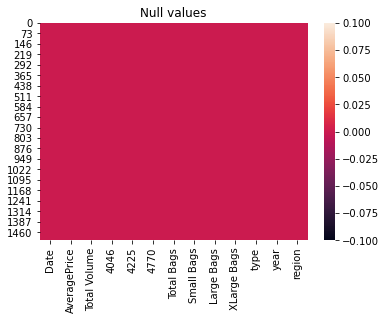

In [12]:
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

Well at first we can see that we are lucky, we don't have any missing values (18249 complete information) and 13 columns. Presently we should do some Feature Engineering on the Date Feature so we can have the option to utilize the day and the month segments in building our model later.
Earlier in info we have seen that Date is Object type not the date type. We have to change its type to date type.

In [13]:
#checking the skewness
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
dtype: float64

AveragePrice        AxesSubplot(0.125,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
4046              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4770             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Total Bags         AxesSubplot(0.125,0.518913;0.133621x0.16413)
Small Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Large Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
year            AxesSubplot(0.766379,0.518913;0.133621x0.16413)
dtype: object

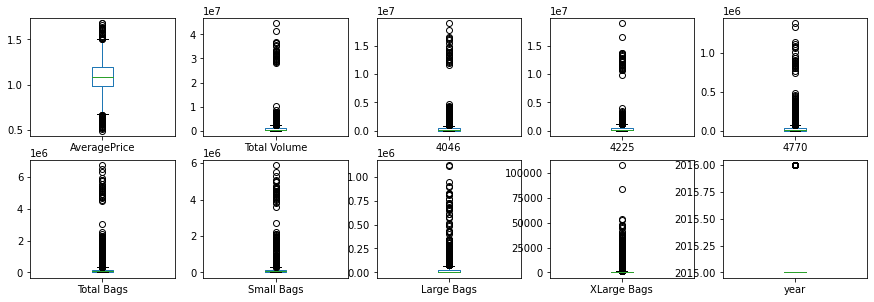

In [14]:
#Plotting bosplot to check the outliers in the datset
df.plot(kind='box',subplots= True,layout=(4,5),figsize=(15,10))

In [15]:
#Changing the date column to date type from object

df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [16]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29



# Now lets do some plotting to get a general idea and Visualize the data to understand it better.

Text(0.5, 1.0, 'Average Price')

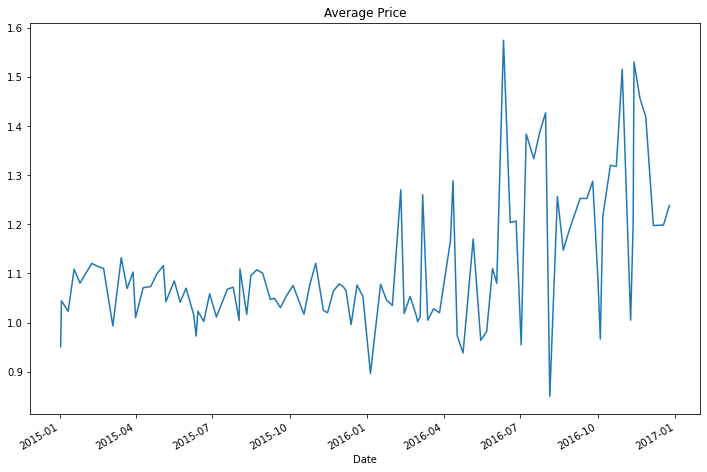

In [17]:
byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

Text(0.5, 1.0, 'Avg Price of Avocado With Respect To Region')

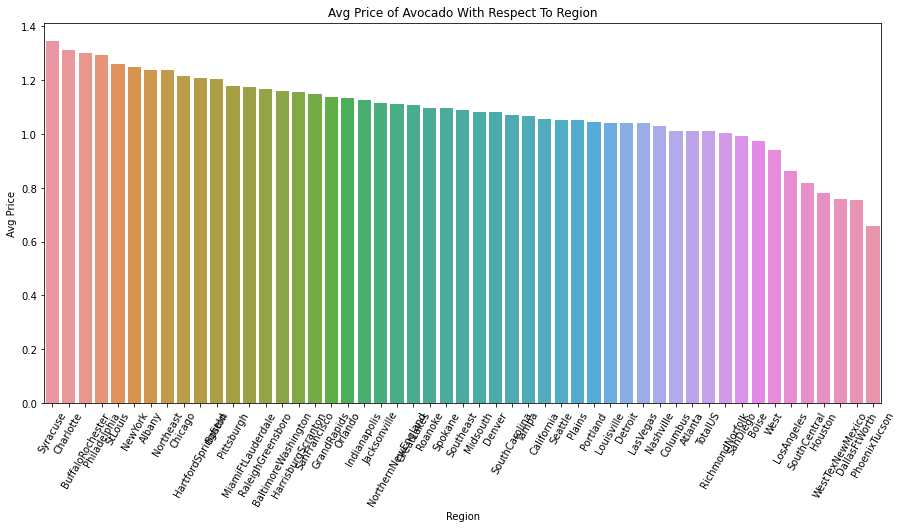

In [18]:
#Lets see What are the TOP Six regions where Average price are very high?

region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(15,7))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=60)
plt.xlabel('Region')
plt.ylabel('Avg Price')
plt.title('Avg Price of Avocado With Respect To Region')


Looks like these region are where price is very high
- Syracuse
- Charlotte
- BuffaloRochester
- Philadelphia
- St Louis
- New York

Text(0.5, 1.0, 'Avg of Total Volume With Respect to Region')

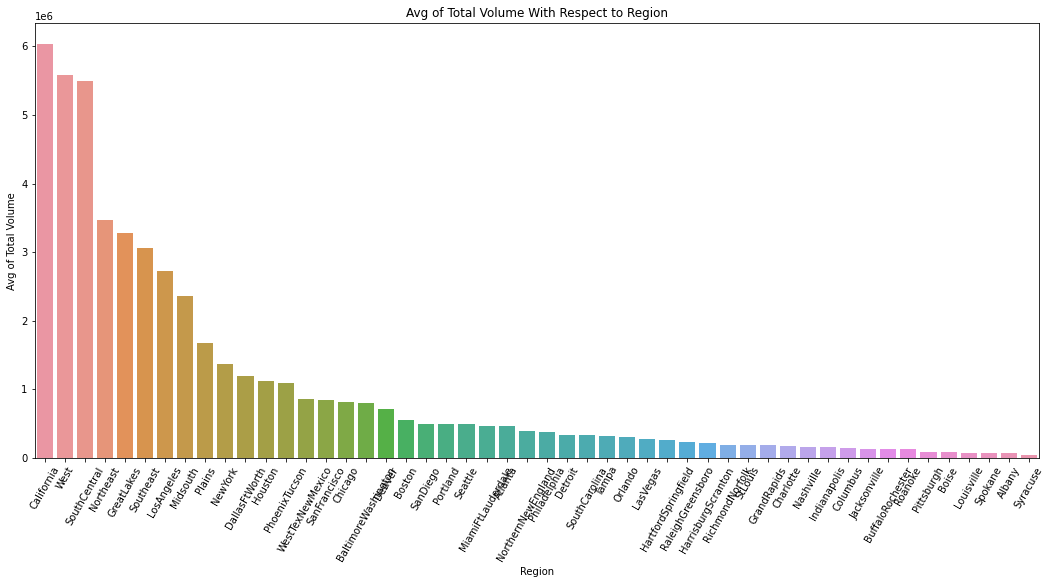

In [19]:
#Lets see What are TOP six regions where Average consumption is very high

filter1=df.region!='TotalUS'
df1=df[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(18,8))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=60)
plt.xlabel('Region')
plt.ylabel('Avg of Total Volume')
plt.title('Avg of Total Volume With Respect to Region')


Looks like these region are where Consumption is very high:
    
- California
- West
- South central
- NorthEast
- GreatLakes
- SouthEast

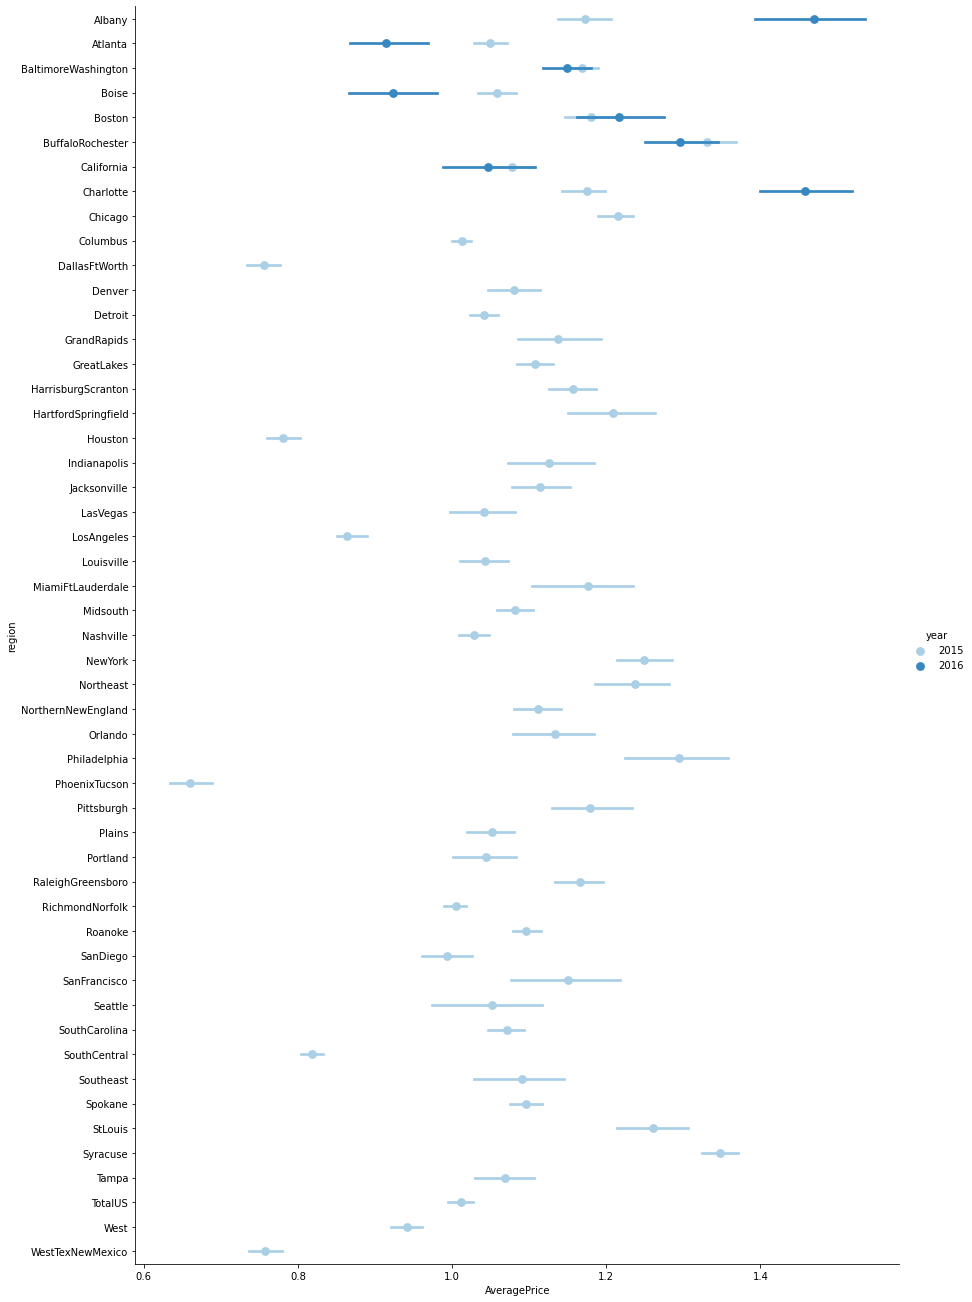

In [20]:
# Lets see In which year and for which region was the Average price the highest

g = sns.factorplot('AveragePrice','region',data=df,
                   hue='year',
                   size=18,
                   aspect=0.7,
                   palette='Blues',
                   join=False,
              )


<AxesSubplot:xlabel='AveragePrice'>

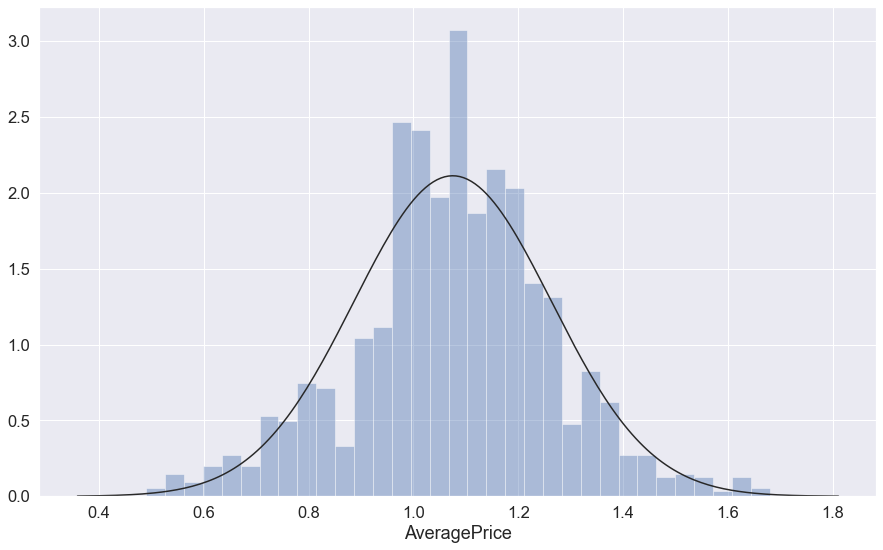

In [21]:
#In which range Average price lies and what is the distribution looks like

sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.AveragePrice, kde=False, fit=norm)


# lets have an idea about the relationship between our Features(Correlation)



<function matplotlib.pyplot.show(close=None, block=None)>

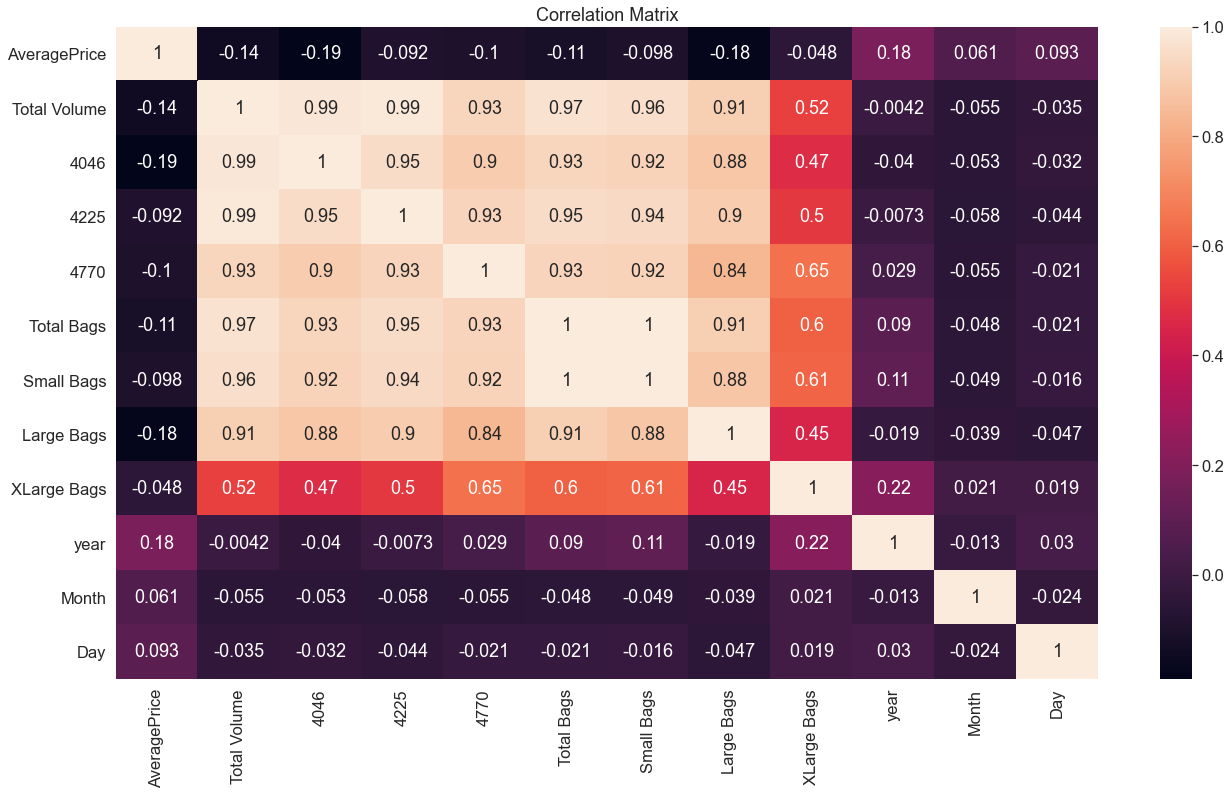

In [22]:
#Doing multivariate analysis to find some correlation in the dataset

plt.figure(figsize=[22,12])
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix')
plt.show

As we can from the heatmap above, every one of the Features is not correlated with the Average Price segment, all things being equal, the majority of them are correlated with one another.

Lets do some Feature Engineering on the categorical Features : 'region' and 'type'



In [23]:
df['region'].nunique()

51

In [24]:
df['type'].nunique()

1

As we can see we have 51 regions and 1 unique type, so we don't really require the Type column, however for the Region it will be somewhat unpredictable so its better to drop the whole column as it won't impact much in my model. I will drop the Date Feature too in light of the fact that I as of now have 3 different columns for the Year, Month and Day.

In [25]:
df_final=pd.get_dummies(df.drop(['region','Date'],axis=1),drop_first=True)

In [26]:
df_final.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29


In [27]:
df_final.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016,10,16
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016,9,10
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016,2,10
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016,9,25
1516,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,2016,9,18


# Random State selection

In [28]:
x=df_final.drop('AveragePrice', axis=1)
y=df_final['AveragePrice']

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
from sklearn.metrics import r2_score

for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30, random_state=i)
    LR.fit(x_train,y_train)
    pred_train=LR.predict(x_train)
    pred_test= LR.predict(x_test)
    print(f'at random state {i}, the training accuracy is: {r2_score(y_train,pred_train)}')
    print(f'at random state {i}, the testing accuracy is: {r2_score(y_test,pred_test)}')
    print('\n')

at random state 1, the training accuracy is: 0.18556058881483461
at random state 1, the testing accuracy is: 0.1662814472237235


at random state 2, the training accuracy is: 0.18089335987402433
at random state 2, the testing accuracy is: 0.17529875658841543


at random state 3, the training accuracy is: 0.20627284728256223
at random state 3, the testing accuracy is: 0.10202677139930338


at random state 4, the training accuracy is: 0.20845615738124768
at random state 4, the testing accuracy is: 0.08154830341305686


at random state 5, the training accuracy is: 0.17916449401904322
at random state 5, the testing accuracy is: 0.1799002459394169


at random state 6, the training accuracy is: 0.19365645496216033
at random state 6, the testing accuracy is: 0.15181996150827914


at random state 7, the training accuracy is: 0.18989258930459252
at random state 7, the testing accuracy is: 0.1497166810476631


at random state 8, the training accuracy is: 0.16672410937632764
at random state 8, th

at random state 70, the testing accuracy is: 0.19091872164519175


at random state 71, the training accuracy is: 0.17699040533649013
at random state 71, the testing accuracy is: 0.18263042098187032


at random state 72, the training accuracy is: 0.2046618417458782
at random state 72, the testing accuracy is: 0.11728172338933651


at random state 73, the training accuracy is: 0.18998121945401747
at random state 73, the testing accuracy is: 0.15806836436011285


at random state 74, the training accuracy is: 0.17329204276331267
at random state 74, the testing accuracy is: 0.19061935170090882


at random state 75, the training accuracy is: 0.19291582776872063
at random state 75, the testing accuracy is: 0.15259160408523398


at random state 76, the training accuracy is: 0.1914416827487494
at random state 76, the testing accuracy is: 0.13373085866326617


at random state 77, the training accuracy is: 0.19150809097860488
at random state 77, the testing accuracy is: 0.14793695369409965


at r

# MODEL SELECTION

Now our data is ready! lets apply our model which is going to be the Linear Regression because our Target variable 'AveragePrice'is continuous. Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable.

# FIRST MODEL using Linear Regression

In [29]:
X=df_final.iloc[:,1:14]
y=df_final['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [30]:
#Creating & Training the Model

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)


In [31]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


MAE: 0.13051948960467755
MSE: 0.029894847165004967
RMSE: 0.17290126420881072


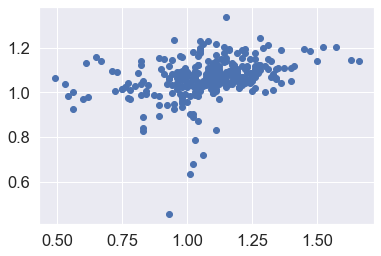

In [32]:
#Lets plot the y_test vs the predictions
plt.scatter(x=y_test,y=pred)

As we can see that we kind of have a straight line so I am not 100% sure that this is the best model we can apply on our data.

LETS CHECK ACTUAL VS PREDICTED FOR THIS MODEL.

,Y Test,Pred
1411,1.66,1.138968
16,1.11,1.062251
1092,1.13,1.063325
783,0.76,1.024988
1145,1.40,1.051495


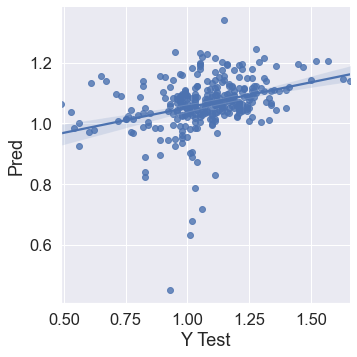

In [33]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

# SECOND MODEL Using Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [35]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.06203914473684207
MSE: 0.007042980098684201
RMSE: 0.08392246480343747


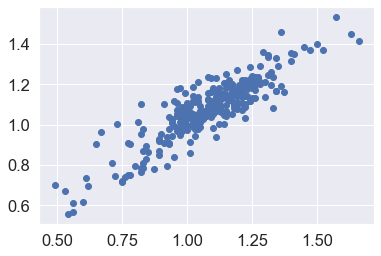

In [36]:
#Lets plot the y_test vs the predictions
plt.scatter(x=y_test,y=pred)

LETS CHECK ACTUAL VS PREDICTED FOR THIS MODEL

,Y Test,Pred
1411,1.66,1.4152
16,1.11,1.0733
1092,1.13,1.0613
783,0.76,0.7406
1145,1.40,1.3171


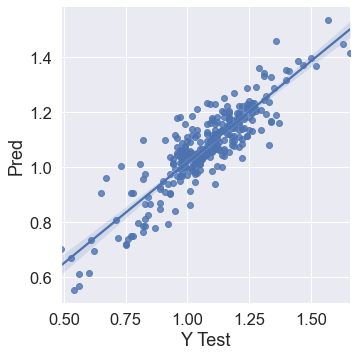

In [37]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

# THIRD MODEL using Decision Tree Regression

In [38]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

In [39]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.0806907894736842
MSE: 0.013252302631578946
RMSE: 0.11511864589013782


Text(0, 0.5, 'Predicted Y')

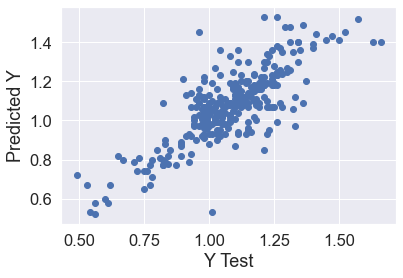

In [40]:
#Lets plot the y_test vs the predictions
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

LETS CHECK ACTUAL VS PREDICTED FOR THIS MODEL.


,Y Test,Pred
1411,1.66,1.40
16,1.11,0.93
1092,1.13,1.08
783,0.76,0.74
1145,1.40,1.37


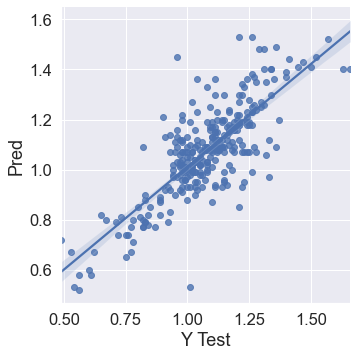

In [41]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

# Lets Check the Cross Validation Score

In [42]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LinearRegression(),X,y, cv=5)
print('Cross validation score of LinearRegression model :',scr.mean())

Cross validation score of LinearRegression model : -0.3799981988121198


In [43]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score( RandomForestRegressor(),X,y, cv=5)
print('Cross validation score of  RandomForestRegressor model :',scr.mean())

Cross validation score of  RandomForestRegressor model : 0.21266650095004697


In [44]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score( DecisionTreeRegressor(),X,y, cv=5)
print('Cross validation score of  DecisionTreeRegressor model :',scr.mean())

Cross validation score of  DecisionTreeRegressor model : -0.38664774075290675


FROM THE ABOVE WE CAN CONCLUDE THAT:

- Random Forest Regressor has the lowest RMSE value which means it was a good fit for our data.
- BY calculating the differnce between the actual and predicted value we can see the Random Forest Regressor was the best fit for our data.
- And also by the above graph representation the model predicted by Random forest regressor has less scattered value from the line.


# GRIDSEARCH CV

In [50]:
from sklearn.model_selection import GridSearchCV

In [54]:
#creating parameters list to pass in GridSearchCv

parameters = {'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}

In [55]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [56]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [57]:
GCV.best_params_

{'criterion': 'mse', 'max_features': 'log2'}

In [58]:
GCV_pred=GCV.best_estimator_.predict(X_test)

# Saving the best model using pkl.

In [62]:
import joblib
filename = 'finalized_model_avocado.pkl'
joblib.dump(GCV.best_estimator_, filename)

['finalized_model_avocado.pkl']

CONCLUSIONS:

- I have seen the effect of sections like sort, year/date on the Average cost increment/decline rate.
- The main derivation drawn from this examination is, I become acquainted with what are the highlights on which cost is profoundly decidedly and adversely coorelated with.
- I came to know through examination which model will be work with better precision with the assistance of low lingering and RMSE scores.
- This task assisted me with acquiring experiences and how I should go with stream, which model to pick first and go bit by bit to accomplish results with great precision. Additionally become more acquainted with where to utilize Linear, Decision Tree and other material and expected models to tweak the forecasts.


In [63]:
#Loading the model to see if it was uploaded perfectly

loaded_model = joblib.load('finalized_model_avocado.sav')
pred=rdr.predict(X_test)
print(pred)

[1.4152 1.0733 1.0613 0.7406 1.3171 0.9762 1.06   1.0287 1.0031 0.8691
 0.7803 1.0419 0.9683 1.2106 1.1704 0.9483 1.1956 1.0791 1.1408 1.0655
 1.0149 1.1402 1.2251 1.0965 0.9018 1.4602 1.0592 1.0993 1.0739 1.3979
 1.0084 1.0385 0.8657 1.0469 1.1104 1.2122 1.2303 1.1661 1.1153 1.1831
 1.0151 1.2122 1.0946 1.2502 1.0462 1.0815 1.0515 1.2032 1.0641 1.1368
 1.231  1.059  1.0397 1.3686 0.7172 0.7865 1.0292 1.2035 0.9425 1.0548
 1.0681 1.2222 1.1953 1.0296 1.0346 1.1354 1.2235 1.1156 1.2335 1.0797
 1.2103 0.9196 1.0627 0.9846 0.9966 1.0389 1.0231 0.6686 1.0123 0.9617
 1.1827 1.066  1.1687 1.0105 1.1972 1.0478 1.1315 1.2394 1.5348 1.0942
 1.044  1.2099 0.9055 1.0787 1.2864 1.1436 0.6947 1.0563 0.8678 1.1837
 1.0333 1.1289 0.9836 0.8398 1.0237 1.0045 1.1345 1.0953 1.1016 1.3604
 1.05   1.0411 1.11   1.0656 1.1967 1.0043 1.2057 1.1077 1.1644 1.035
 1.1008 1.0254 1.1405 1.1765 0.9945 0.5676 0.9799 1.1303 1.0008 1.1007
 1.1093 1.0502 0.9772 1.0736 1.3435 1.0478 1.1629 1.1182 0.9771 1.1218
 1.0854

P.S- I have done the prediction by not taking the region input, but on the basis of avg price.